# Unsupervised Learning

## K-Means

Let us suppose to face a clustering task on the Iris Dataset, e.g., we would like to understand if there are some groups of similar flowers in the dataset, without looking at the flower's classes.

First, we can load the dataset, which is provided by sklearn

In [17]:
from sklearn import datasets
from scipy.stats import zscore
from sklearn.utils import shuffle

iris = datasets.load_iris()
X = zscore(iris.data[:, [1, 2]])
X = shuffle(X)

We consider $3$ clusters (n_clusters parameter), the initial centroids are uniformly sampled in the input space (init parameter) and the initialization is performed only once (n_init parameter).


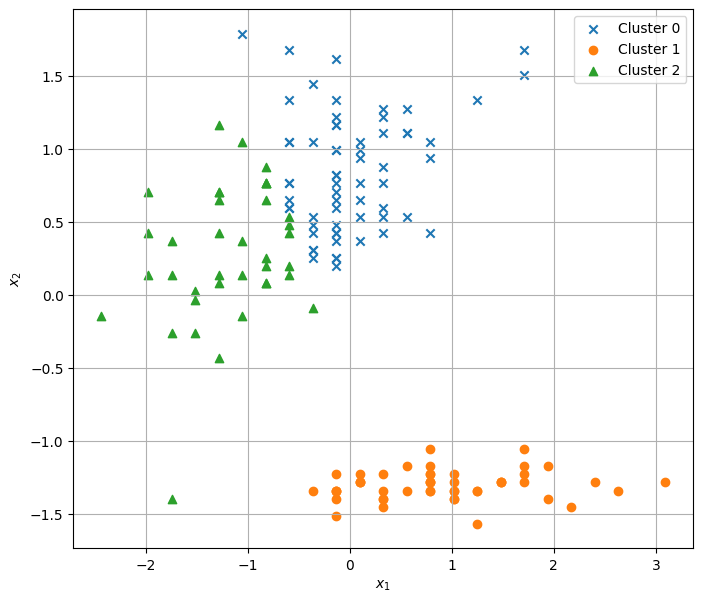

75.14898428592991

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K = 3

kmeans = KMeans(n_clusters=K, init='random', n_init=1).fit(X)

plt.figure(figsize=(8,7))
mark = 'xo^'
for nclust in range(K):
  plt.scatter(X[kmeans.labels_ == nclust, 0], X[kmeans.labels_ == nclust, 1], marker=mark[nclust], label='Cluster ' + str(nclust))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.legend()
plt.show()

kmeans.cluster_centers_
kmeans.inertia_


Thanks to the property of the EM-algorithm, we have assurance that the K-means algorithm converges, but due to the fact that the cost function is not convex it might get stuck in a local minimum. For instance, initializing the centers in

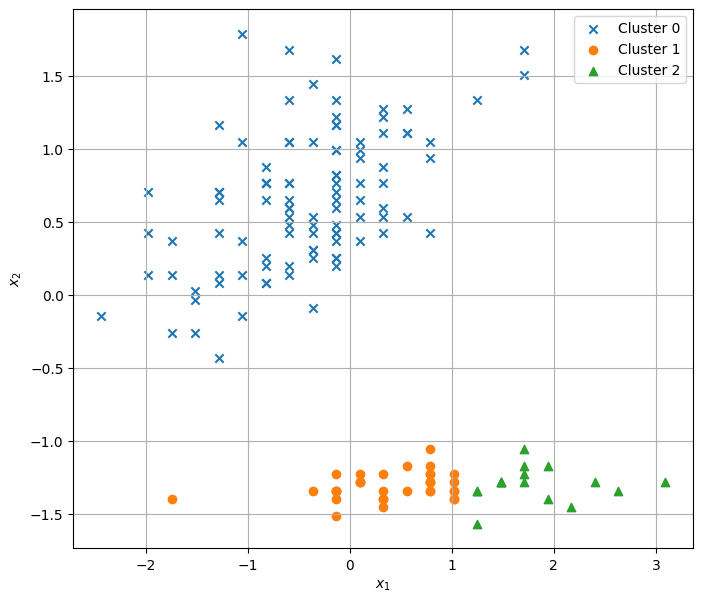

95.46586890385807

In [7]:
init_centers = [[-0.4, 0.6], [0.4, -1.5], [1.8, -1.3]]

kmeans = KMeans(n_clusters=K, init=init_centers, n_init=1).fit(X)

plt.figure(figsize=(8, 7))
mark = 'xo^'
for nclust in range(K):
  plt.scatter(X[kmeans.labels_ == nclust, 0], X[kmeans.labels_ == nclust, 1], marker=mark[nclust], label='Cluster ' + str(nclust))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.legend()
plt.show()

kmeans.inertia_

To avoid that situation like in the previous figure happens, there exists a modified version of the K--means, called K--means++, which have a different strategy for clusters initialization:
* The first centroid is a random point among the one in the dataset
* Weights $w_i$ proportional to the distance from the other centroid are computed
* Another point from the dataset is extracted randomly with weights $w_i$
* The last two steps are repeated until $K$ centroids have been chosen

It also repeats this procedure multiple times, choosing the initialization providing the lowest value for the initial inertia_ parameter


In [8]:
kmeans = KMeans(n_clusters=K, init='k-means++', n_init='auto').fit(X)

Let us plot the dissimilarity matrix of the original data. The more the color is intense, the more the data distance is small. In principle, if the data are organized in clusters we should see some structure in the data.

<Axes: >

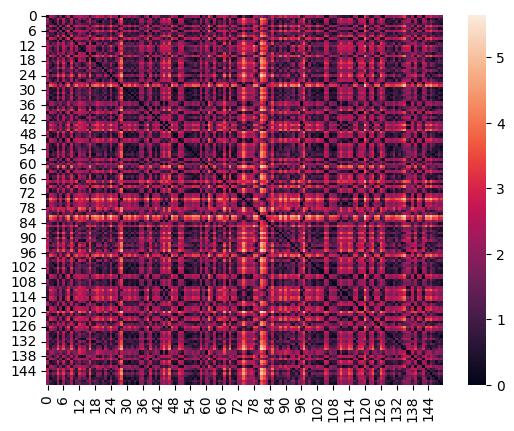

In [9]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sb

diss = pdist(X, metric="euclidean")
diss_matrix = squareform(diss)

sb.heatmap(diss_matrix)

Let us sort the data putting all the samples coming from the same clusters in similar position in the dataset

<Axes: >

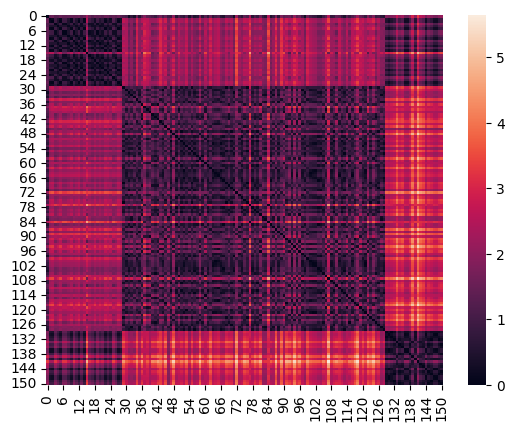

In [10]:
import numpy as np

X_ord = np.empty((1, 2))

for n_clust in range(K):
  X_ord = np.vstack([X_ord, X[kmeans.labels_ == n_clust, :]])


diss = pdist(X_ord, metric="euclidean")
diss_matrix = squareform(diss)

sb.heatmap(diss_matrix)

## Mixture Models

In the case we want a technique which can model in a more general way our distribution in the input space we resort to Mixture Models. We will consider again only two components of the input of the iris dataset

In [11]:
from sklearn import datasets
from scipy.stats import zscore
from sklearn.utils import shuffle

iris = datasets.load_iris()
X = iris.data[:, [1, 2]]
X = shuffle(X)

We fit a GMM with the function \texttt{GaussianMixture.fit()} which requires as parameters the dataset and the number of Gaussian distributions $K$ to use (in this example we set $K = 3$):

In [12]:
from sklearn.mixture import GaussianMixture
K=3

gm = GaussianMixture(n_components=K).fit(X)

mu = gm.means_
sigma = gm.covariances_
pi = gm.weights_
mu, sigma, pi

(array([[2.80761896, 4.5119225 ],
        [3.42800034, 1.46200005],
        [2.99905305, 5.68369391]]),
 array([[[0.09396825, 0.10576063],
         [0.10576063, 0.37691681]],
 
        [[0.14081666, 0.01146395],
         [0.01146395, 0.029557  ]],
 
        [[0.11617695, 0.0627613 ],
         [0.0627613 , 0.35128144]]]),
 array([0.44246091, 0.33333323, 0.22420585]))

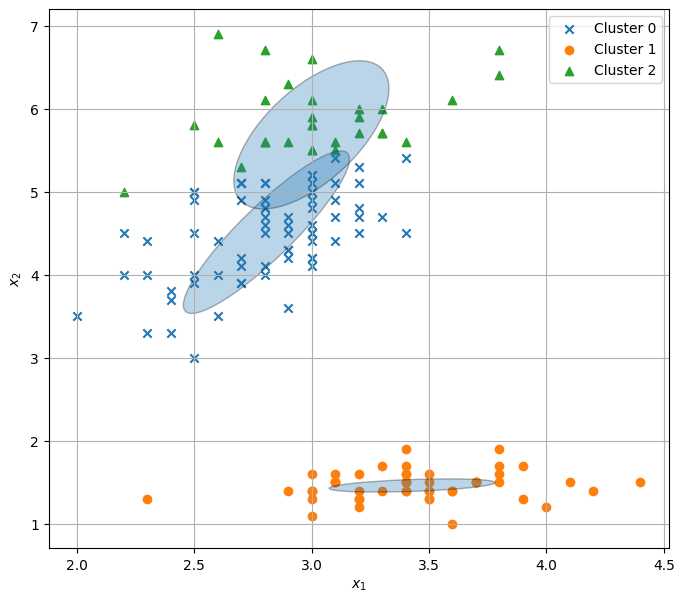

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from numpy import linalg
import math

gmm_labels = gm.predict(X)

plt.figure(figsize=(8, 7))
mark = 'xo^'
for nclust in range(K):
  plt.scatter(X[gmm_labels == nclust, 0], X[gmm_labels == nclust, 1], marker=mark[nclust], label='Cluster ' + str(nclust))

ax = plt.gca()

for nclust in range(K):
  eigen = linalg.eig(sigma[nclust,:])
  theta = math.atan(eigen.eigenvectors[0,0] / eigen.eigenvectors[0,1])
  ell = Ellipse(mu[nclust,:], 5* eigen.eigenvalues[1], 5* eigen.eigenvalues[0], angle=math.degrees(theta), edgecolor='k', alpha=0.3)
  ax.add_patch(ell)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.legend()
plt.show()

## Dimensionality Reduction: Principal Component Analysis

Principal Component Analysis (PCA) is an unsupervised technique to perform dimensionality reduction, i.e., to extract some low dimensional features from a dataset. Especially, we aim to find a linear transformation of the original data X s.t. the largest variance lies on the first transformed feature, the second largest variance on the second transformed feature and so on. At last, we only keep some of the features we extracted.

To see how to perform PCA in practice, let us start once again from the Iris Dataset

In [32]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data

To identify the principal components (i.e., the extracted features), we have to:

1. Normalize the original inputs X to obtain a matrix ($\tilde{X}$) with zero (column-wise) mean;
2. Compute the covariance matrix of $\tilde{X}$, i.e., $C = \tilde{X}^\top \tilde{X}$;
3. Compute the eigenvectors $e$ and eigenvalues $\lambda$ of $C$:
  
  - The eigenvector $e_1$ corresponding to the largest eigenvalue $\lambda_1$ will be the first principal component direction;

  - The eigenvector $e_2$ corresponding to the largest eigenvalue $\lambda_2$ will be the second principal component direction;

  - ...


Let us center the data in X (step 1)

In [56]:
import numpy as np

X_tilde = X - np.mean(X, axis=0)

# Note: np.mean(X, axis=0) returns a vector containing the mean of each column
np.mean(X, axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

We now compute the covariance matrix $C$ (step 2)

In [34]:
C = np.dot(X_tilde.T, X_tilde)

print(C)

[[102.16833333  -6.32266667 189.873       76.92433333]
 [ -6.32266667  28.30693333 -49.1188     -18.12426667]
 [189.873      -49.1188     464.3254     193.0458    ]
 [ 76.92433333 -18.12426667 193.0458      86.56993333]]


We extract the eigenvectors and eigenvalues of $C$ with the eig function of numpy (https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

In [35]:
eigenvalues, eigenvectors = np.linalg.eig(C)

print('eigenvalues:\n', eigenvalues)
print('eigenvectors:\n', eigenvectors)

# Note: each column of eigenvectors is the unit-length eigenvector corresponding to the i-th eigenvalue in eigenvalues

eigenvalues:
 [630.0080142   36.15794144  11.65321551   3.55142885]
eigenvectors:
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


The columns of the eigenvectors matrix identify the directions of the principal components. Thus, we have obtained the linear transformation matrix ($V$) we were looking for, and we can now transform the data as $T = \tilde{X} V$

In [36]:
V = eigenvectors

T = np.dot(X_tilde, V)

print('Original data point:', X[21])
print('Transformed data point:', T[21])

Original data point: [5.1 3.7 1.5 0.4]
Transformed data point: [-2.54370523 -0.43299606  0.20845723  0.0410654 ]


### PCA with Scikit Learn

Notably, there exist a much easier strategy to obtain the same linear transformation: use the scikit learn implementation (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [37]:
from sklearn.decomposition import PCA

# we create a PCA object
pca = PCA()

# we fit the dataset in X
pca.fit(X)

# we extract the principal components directions
print('first principal component direction:', pca.components_[:,0])

# and the corresponding explained variance
explained = pca.explained_variance_[0]
print('explained variance:', explained)

first principal component direction: [ 0.36138659  0.65658877 -0.58202985 -0.31548719]
explained variance: 4.228241706034864


Finally, we can transoform the data as $T = \tilde{X} W$

In [38]:
T = pca.transform(X)

print('The same data point as before:', T[21])

The same data point as before: [-2.54370523  0.43299606  0.20845723 -0.0410654 ]


### From Linear Transformation to Dimensionality Reduction

Until now, we have simply transoformed the dataset, but we didn't reduce its dimensions. To perform dimensionality reduction, we can keep just the first $k$ columns of the linear transformation matrix $V$ (i.e., the first $k$ new axes) instead of all of them.

But how can we choose $k$ properly? There exist several different strategies, such as:
- Keep all the principal components until we cumulate at least 90% (or 95%) of the variance;
- Keep all the principal components which explain more of the 5% of the variance;
- Find the elbow in the cumulated variance.


E.g., let us look for the elbow of the explained variance (as a function of the number of components)

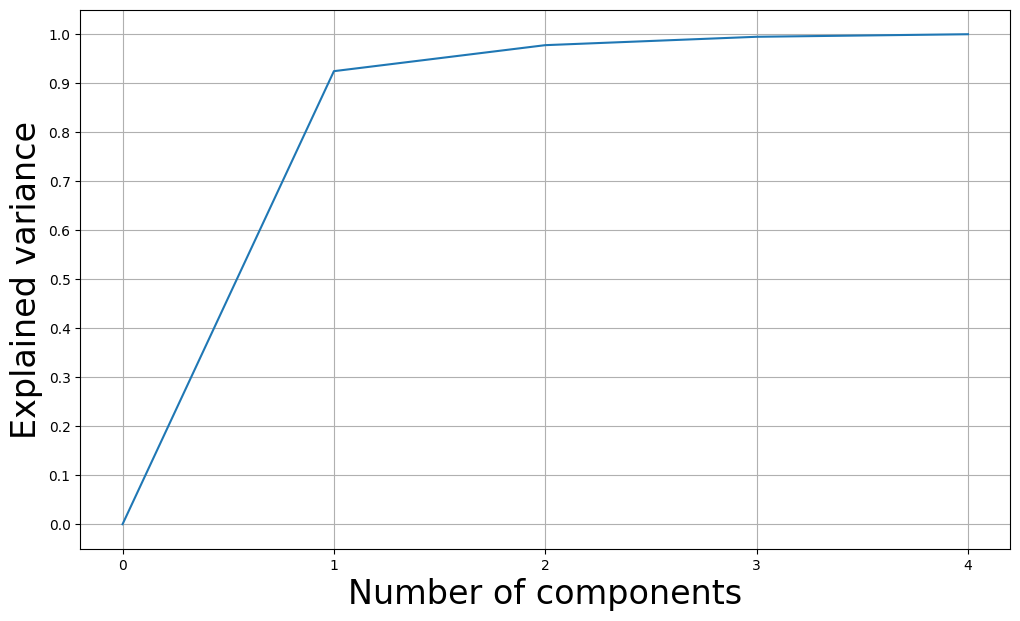

In [45]:
from matplotlib import pyplot as plt

exp_variance = pca.explained_variance_
perc_exp_variance = np.cumsum(exp_variance) / sum(exp_variance)
perc_exp_variance = np.insert(perc_exp_variance, 0, 0.)

plt.figure(figsize=(12,7))
plt.plot(range(5), perc_exp_variance)
plt.xlabel('Number of components', fontsize=24)
plt.ylabel('Explained variance', fontsize=24)
plt.xticks(range(5))
plt.yticks(np.arange(0., 1.1, 0.1))
plt.grid()
plt.show()

In [54]:
perc_exp_variance = np.cumsum(exp_variance) / sum(exp_variance)

T_red = T[:, perc_exp_variance < 0.98]
T_red[21,:]

array([-2.54370523,  0.43299606])

We can see that the first two principal components dimensions accounts for the largest share of the explained variance (around 98%). Thus we may choose $k = 2$ to obtain the new dataset $T_2 = \tilde{X} V_{1,2}$, where $V_{1,2}$ is obtained from $V$ keeping the first two columns.

In [57]:
# without Scikit Learn
T_12 = np.dot(X_tilde, V[:,:2])

print('Data point with reduced dimensionality', T_12[21])

Data point with reduced dimensionality [-2.54370523 -0.43299606]


In [58]:
# with Scikit Learn
pca2 = PCA(n_components=2)
T_12 = pca2.fit_transform(X)

print('Data point with reduced dimensionality', T_12[21])

Data point with reduced dimensionality [-2.54370523  0.43299606]


### PCA for Classification

There are multiple purposes to perform the PCA and project the dataset into a lower dimensional space. At first, we could consider the principal components analysis as a feature extraction technique for classification and regression tasks.

Let us get back to the 'Iris-Setosa' classification task. First, we recover the corresponding targets from the dataset.

In [65]:
# the dataset is stored in the variable iris
y = iris.target.copy()
# 0 - setosa, 1 - versicolor, 2 - virginica
y[y == 1] = 2
y[y == 0] = 1
y[y == 2] = 0

print('Iris-Setosa targets\n', y)

Iris-Setosa targets
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Let us consider a logistic regression trained over different input dataset, i.e.
, the original one ($X$), the first two principal components ($T_{1,2}$) and the last two ($T_{3,4}$).

In [73]:
from sklearn.linear_model import LogisticRegression

# logistic regression on the original dataset
log_classifier_original = LogisticRegression(penalty=None) # regularization is applied as default
log_classifier_original.fit(X, y)
y_hat_original = log_classifier_original.predict(X)
acc_original = sum(y_hat_original == y) / len(y)
print('Accuracy original:', acc_original)

# logistic regression on the first two pc
T_12 = np.dot(X_tilde, V[:,:2])
log_classifier_12 = LogisticRegression(penalty=None)
log_classifier_12.fit(T_12, y)
y_hat_12 = log_classifier_12.predict(T_12)
acc_12 = sum(y_hat_12 == y) / len(y)
print('Accuracy first two pc:', acc_12)

# logiastic regression on the last two pc
T_34 = np.dot(X_tilde, V[:,2:])
log_classifier_34 = LogisticRegression(penalty=None)
log_classifier_34.fit(T_34, y)
y_hat_34 = log_classifier_34.predict(T_34)
acc_34 = sum(y_hat_34 == y) / len(y)
print('Accuracy last two pc:', acc_34)

Accuracy original: 1.0
Accuracy first two pc: 1.0
Accuracy last two pc: 0.6666666666666666


As you can see, the use of the first two principal components gives similar results, since they accounts for around 98% of the variance of the original data. Instead, it makes little sense to use the last two principal components (which explain a small share of the variance) and the corresponding accuracy drops significantly.

Indeed, let us visualize the data in the space defined by the first two principal components as opposed to the last two

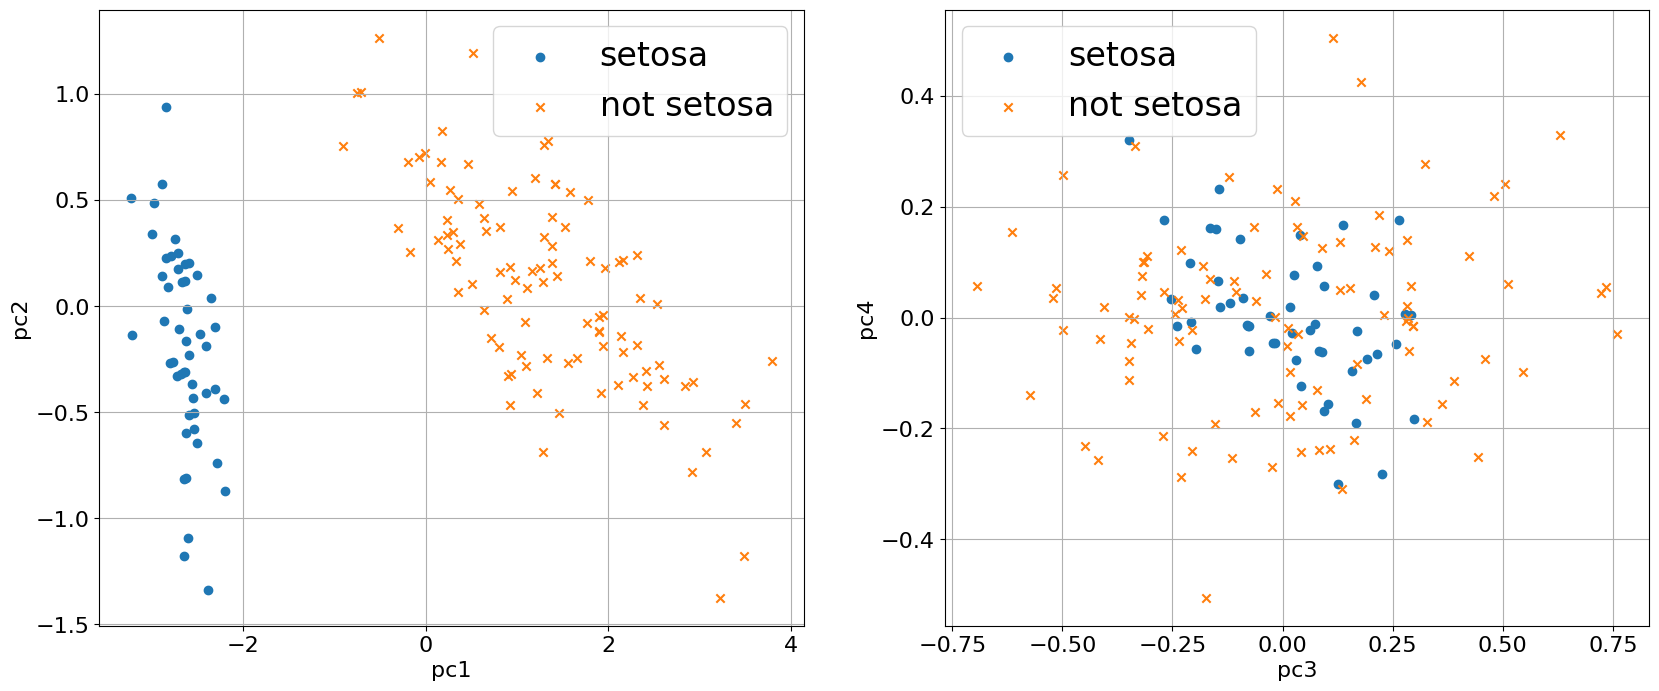

In [71]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

setosa = T_12[y == 1]
not_setosa = T_12[y == 0]

plt.rcParams['font.size'] = '24'

ax1.scatter(setosa[:, 0], setosa[:, 1], label='setosa')
ax1.scatter(not_setosa[:, 0], not_setosa[:, 1], label='not setosa', marker='x')
ax1.set(xlabel='pc1', ylabel='pc2')
ax1.grid()
ax1.legend()

setosa = T_34[y == 1]
not_setosa = T_34[y == 0]

ax2.scatter(setosa[:, 0], setosa[:, 1], label='setosa')
ax2.scatter(not_setosa[:, 0], not_setosa[:, 1], label='not setosa', marker='x')
ax2.set(xlabel='pc3', ylabel='pc4')
ax2.grid()
ax2.legend()

plt.show()

As a final remark we should underline that the PCA does not make use of the label when is performed on a dataset, while other model selection techniques are based on the a posteriori performance of the classifier (e.g., feature selection).

# Homeworks

### Principal Components Analysis for Compression

PCA can be seen as a compression method. Try to reconstruct the original dataset $X$ from the transformed dataset $T_{1,2}$ and the weights $W_{1,2}$. Do the same with $T_{3,4}$ and $W_{3,4}$. Which one works better? In which case we could perfectly reconstruct the original dataset?